In [1]:
'''
original code source : https://www.kaggle.com/aidapearson/eda-starter-notebook
'''

'\noriginal code source : https://www.kaggle.com/aidapearson/eda-starter-notebook\n'

In [22]:
%matplotlib inline

import sys
sys.path.insert(1, '/opt/ml/team/gj/code')
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
from typing import List

from checkpoint import load_checkpoint
from flags import Flags
from IPython.display import display, HTML
plt.style.use('dark_background')

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
checkpoint = "/opt/ml/team/gj/code/log/satrn_locality_aware/checkpoints/best.pth"
checkpoint = load_checkpoint(checkpoint, cuda=False)
options, _ = Flags(checkpoint["configs"]).get()

In [8]:
def create_data_frame(default_image_path:str,data_paths:List[str],level_path:str,source_path:str):
    data = {}
    data['latex'] = []
    data['seq_len'] = []
    data['aspect_ratio'] = []
    data['image_width'] = []
    data['image_height'] = []
    data['level']=[]
    data['source']=[]
    all_latex_list = []
    lv1_latex_list=[]
    lv2_latex_list=[]
    lv3_latex_list=[]
    lv4_latex_list=[]
    lv5_latex_list=[]
    
    with open(level_path) as f:
        level_info={}
        for line in f:
            path,level=line.replace("\n","").split("\t")
            level_info[path]=int(level)
            
    with open(source_path) as f:
        source_info={}
        for line in f:
            path,source=line.replace("\n","").split("\t")
            source_info[path]=str(source)
    for data_path in data_paths:
        with open(data_path) as f:
            for idx,line in enumerate(f):
                image_path,latex=line.replace("\n","").split("\t")
                image = Image.open(default_image_path+image_path)
                width, height = image.size
                data['aspect_ratio'].append(round(width / height,1))
                data['image_width'].append(int(width))
                data['image_height'].append(int(height))
                latex=latex.split(" ")
                data['latex'].append(latex)
                data['seq_len'].append(len(latex))
                level=level_info[image_path]
                data['level'].append(level)
                source=source_info[image_path]
                data['source'].append(source)
                all_latex_list += latex
                if level==1:
                    lv1_latex_list += latex
                elif level==2:
                    lv2_latex_list += latex
                elif level==3:
                    lv3_latex_list += latex
                elif level==4:
                    lv4_latex_list += latex
                else:
                    lv5_latex_list += latex
    df = pd.DataFrame.from_dict(data)
    lv_latex_list=[lv1_latex_list,lv2_latex_list,lv3_latex_list,lv4_latex_list,lv5_latex_list]
    return df, all_latex_list,lv_latex_list

In [18]:
df, all_latex_list, lv_latex_list = create_data_frame(
    default_image_path='/opt/ml/input/data/train_dataset/images/',
    data_paths=options.data.train,
    level_path="/opt/ml/input/data/train_dataset/level.txt",
    source_path="/opt/ml/input/data/train_dataset/source.txt"
)

In [19]:
t_df, t_all_latex_list, t_lv_latex_list = create_data_frame(
    default_image_path='/opt/ml/input/data/train_dataset/images/',
    data_paths=options.data.test,
    level_path="/opt/ml/input/data/train_dataset/level.txt",
    source_path="/opt/ml/input/data/train_dataset/source.txt"
)

In [20]:
df.columns

Index(['latex', 'seq_len', 'aspect_ratio', 'image_width', 'image_height',
       'level', 'source'],
      dtype='object')

In [23]:
display(df.describe())
display(t_df.describe())

,seq_len,aspect_ratio,image_width,image_height,level
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,17.522875,4.343922,1307.989650,333.200375,2.392288
std,14.923714,2.489650,1120.466136,314.045916,0.845596
min,1.000000,0.100000,35.000000,21.000000,1.000000
25%,7.000000,2.600000,563.000000,173.000000,2.000000
50%,13.000000,3.800000,1010.500000,254.000000,2.000000
75%,23.000000,5.500000,1729.000000,392.000000,3.000000
max,252.000000,33.900000,11810.000000,10020.000000,5.000000


,seq_len,aspect_ratio,image_width,image_height,level
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,17.593150,4.346250,1314.630950,332.689000,2.392100
std,15.068343,2.463984,1122.702634,305.255049,0.845514
min,2.000000,0.100000,41.000000,20.000000,1.000000
25%,7.000000,2.600000,560.000000,172.000000,2.000000
50%,13.000000,3.800000,1020.000000,255.500000,2.000000
75%,23.000000,5.500000,1750.500000,394.000000,3.000000
max,235.000000,24.000000,11590.000000,9037.000000,5.000000


In [47]:
def plot_dist(df, field, bins, color, xlabel, ylabel, title):
    sns.set(color_codes=True)
    fig, ax = plt.subplots(figsize=(18,4))
    
    sns.distplot(df[field], bins=bins, color=color)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.title(title, fontsize=20)
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


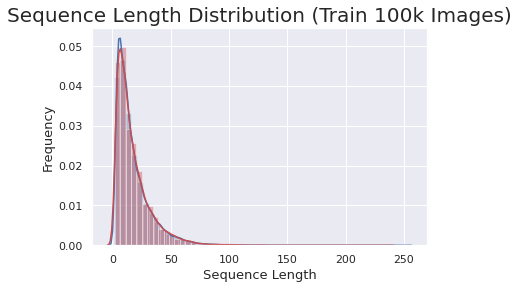

In [45]:
plot_dist(df=df, field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
          ylabel='Frequency', title='Sequence Length Distribution (Train 100k Images)')
plot_dist(df=t_df, field='seq_len', bins=50, color='r', xlabel='Sequence Length', \
          ylabel='Frequency', title='Sequence Length Distribution (Train 100k Images)')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


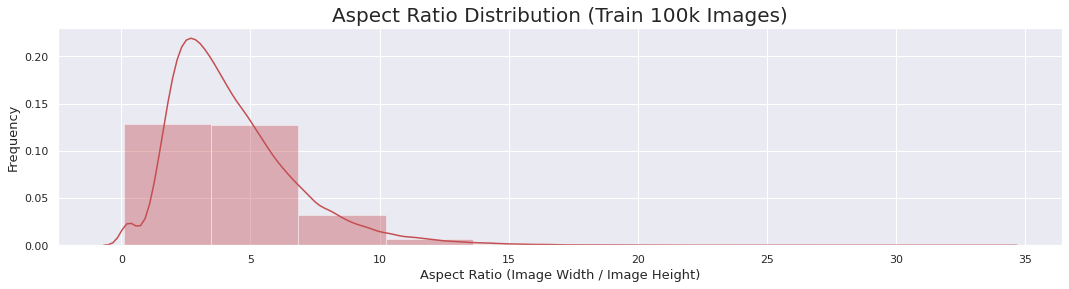

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


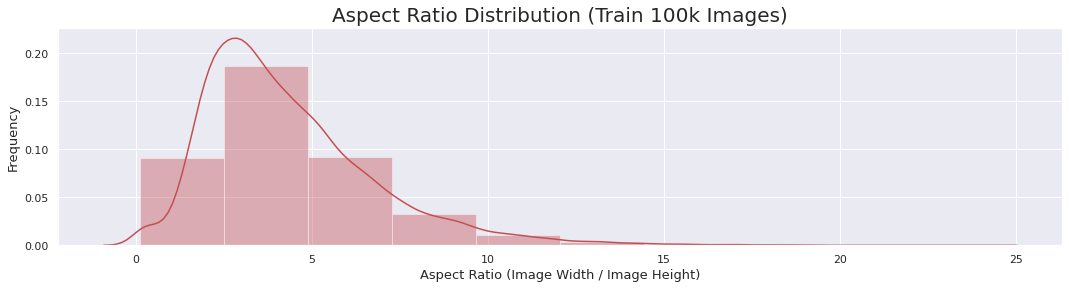

In [49]:
plot_dist(df=df, field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
          ylabel='Frequency', title='Aspect Ratio Distribution (Train 100k Images)')
plot_dist(df=t_df, field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
          ylabel='Frequency', title='Aspect Ratio Distribution (Train 100k Images)')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyboardInterrupt: 

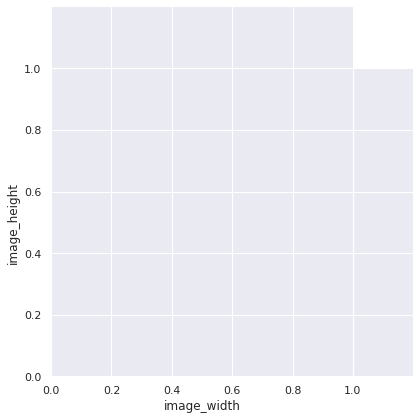

In [50]:
g = sns.jointplot("image_width", "image_height", data=df, kind="kde", space=0, color="r")
g.set_axis_labels("Image Width", "Image Height")

In [12]:
def create_count_df(df, field, index,top_token):
    count=df.groupby(field)[index].count().sort_values(ascending=False)
    count_df = count.to_frame().reset_index()
    count_df.columns = [field, field + '_count']
    return count_df[:top_token]

def plot_count_df(df, field, random_sample, color, rotation, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(18,6))
    if random_sample:
        df = df.sample(n=50, random_state=1)
    ax.bar(df[field], df[field + '_count'], color=color, align='center',alpha=0.5)
    ax.set_xticklabels(df[field],rotation=rotation, fontsize=13)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_title(title, fontsize=20)
    plt.show()


In [13]:
token_df = pd.DataFrame(all_latex_list, columns =['token'])
token_df['index']=token_df.index

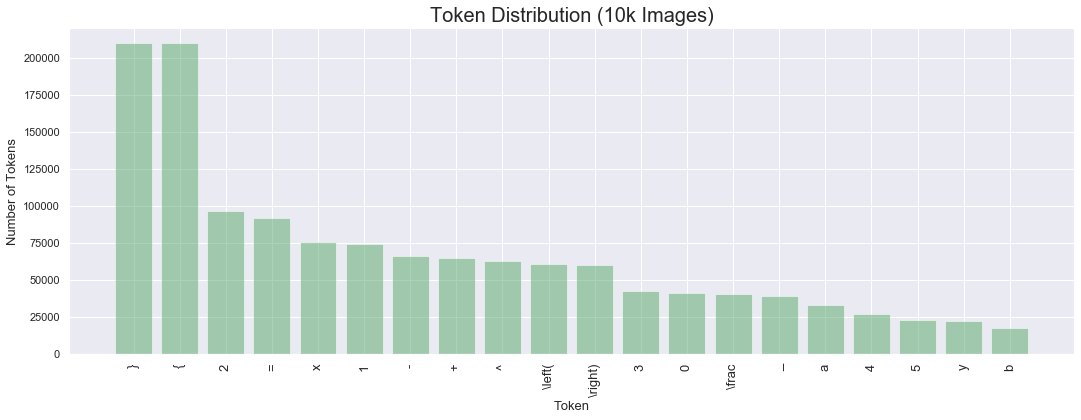

In [14]:
token_count_df = create_count_df(df=token_df, field='token', index='index',top_token=20)
plot_count_df(df=token_count_df, field='token', random_sample=False, color='g', rotation=90, xlabel='Token', \
              ylabel='Number of Tokens', title='Token Distribution (10k Images)')

In [53]:
level_1 = df[df['level'] == 1]
level_2 = df[df['level'] == 2]
level_3 = df[df['level'] == 3]
level_4 = df[df['level'] == 4]
level_5 = df[df['level'] == 5]
level_dfs=[level_1,level_2,level_3,level_4,level_5]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


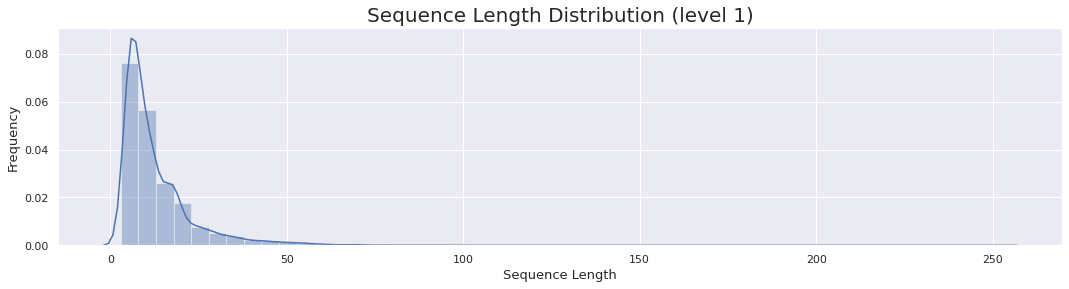

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


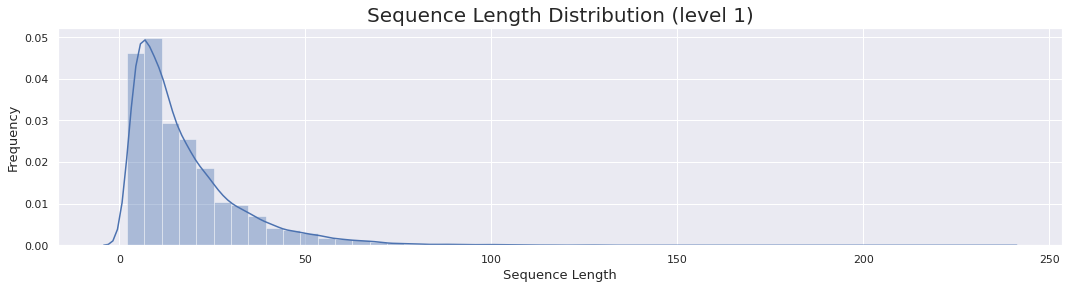

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


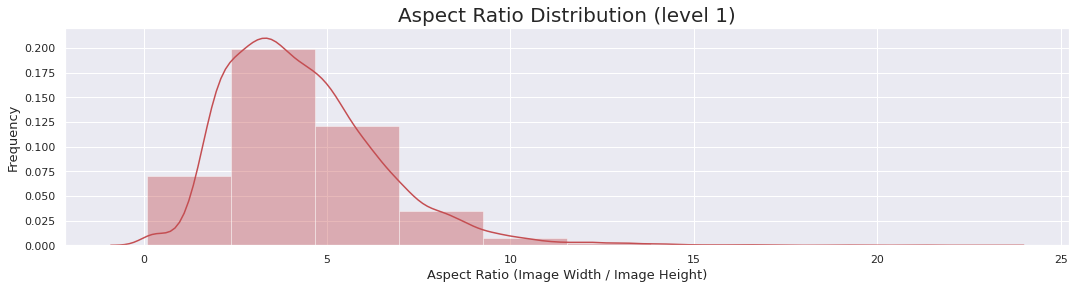

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


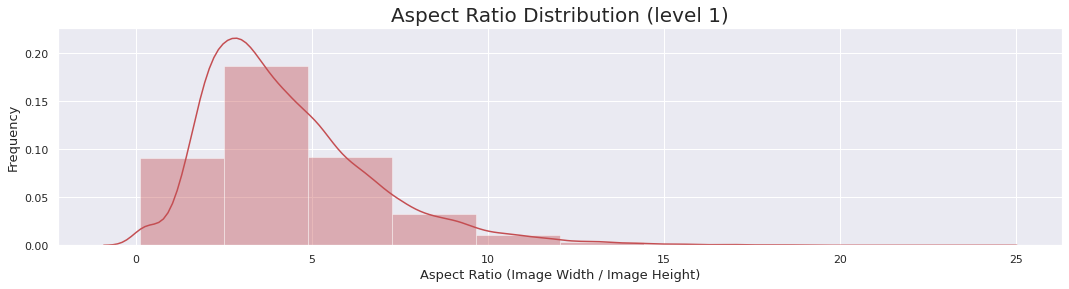

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: name 'create_count_df' is not defined

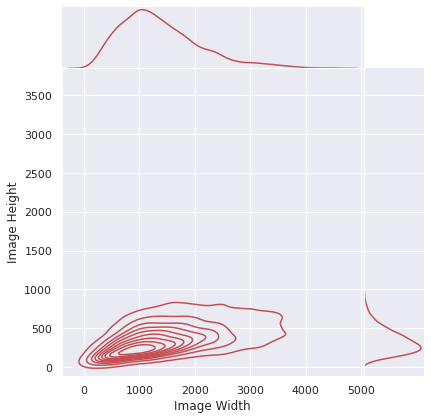

In [55]:
for level,df in enumerate(level_dfs):
    plot_dist(df=df, field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
          ylabel='Frequency', title='Sequence Length Distribution (level {})'.format(level+1))
    plot_dist(df=t_df, field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
          ylabel='Frequency', title='Sequence Length Distribution (level {})'.format(level+1))
    plot_dist(df=df, field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
          ylabel='Frequency', title='Aspect Ratio Distribution (level {})'.format(level+1))
    plot_dist(df=t_df, field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
          ylabel='Frequency', title='Aspect Ratio Distribution (level {})'.format(level+1))
    g = sns.jointplot("image_width", "image_height", data=df, kind="kde", space=0, color="r")
    g.set_axis_labels("Image Width", "Image Height")
    token_df = pd.DataFrame(lv_latex_list[level], columns =['token'])
    token_df['index']=token_df.index
    token_count_df = create_count_df(df=token_df, field='token', index='index',top_token=20)
    plot_count_df(df=token_count_df, field='token', random_sample=False, color='g', rotation=90, xlabel='Token', \
              ylabel='Number of Tokens', title='Token Distribution (level {})'.format(level+1))
    

In [ ]:
level=0
level_dfs[level].describe()

In [ ]:
plot_dist(df=level_dfs[level], field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
      ylabel='Frequency', title='Sequence Length Distribution (level {})'.format(level+1))
plot_dist(df=level_dfs[level], field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
      ylabel='Frequency', title='Aspect Ratio Distribution (level {})'.format(level+1))
g = sns.jointplot("image_width", "image_height", data=level_dfs[level], kind="kde", space=0, color="r")
g.set_axis_labels("Image Width", "Image Height")
token_df = pd.DataFrame(lv_latex_list[level], columns =['token'])
token_df['index']=token_df.index
token_count_df = create_count_df(df=token_df, field='token', index='index',top_token=20)
plot_count_df(df=token_count_df, field='token', random_sample=False, color='g', rotation=90, xlabel='Token', \
          ylabel='Number of Tokens', title='Token Distribution (level {})'.format(level+1))

In [18]:
level=1
level_dfs[level].describe()

,seq_len,aspect_ratio,image_width,image_height,level
count,43530.000000,43530.000000,43530.000000,43530.000000,43530.0
mean,16.062807,4.514135,1127.237308,260.942959,2.0
std,13.074280,2.592353,852.137064,179.185521,0.0
min,1.000000,0.100000,35.000000,21.000000,2.0
25%,7.000000,2.700000,492.000000,155.000000,2.0
50%,12.000000,3.900000,860.000000,216.000000,2.0
75%,21.000000,5.700000,1539.000000,315.000000,2.0
max,164.000000,33.900000,8918.000000,3416.000000,2.0


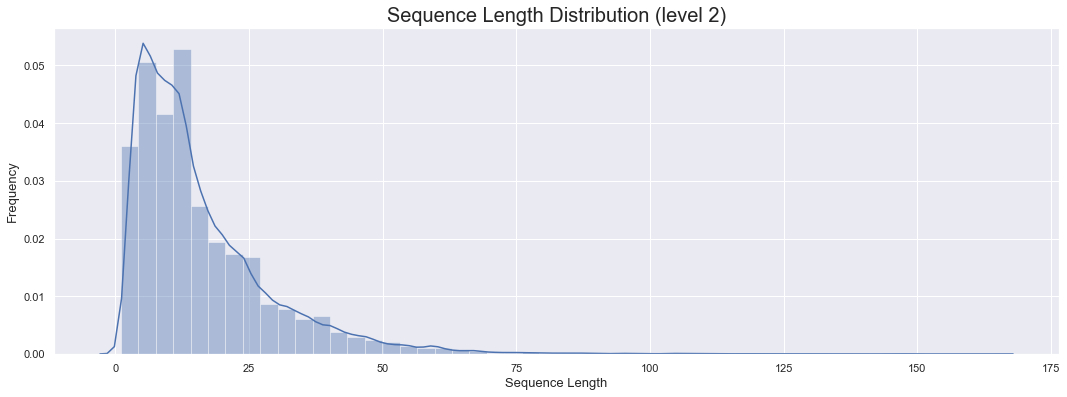

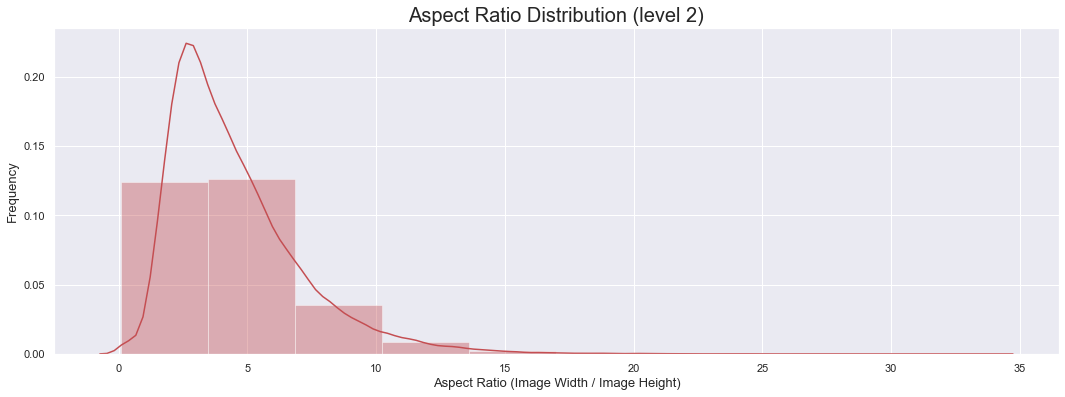

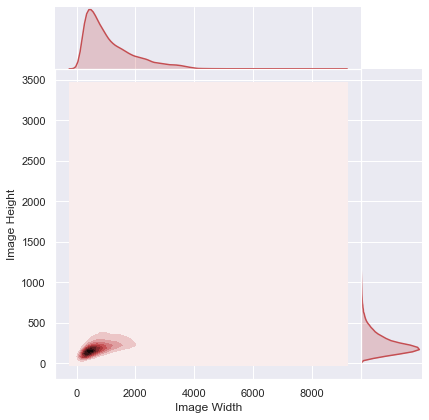

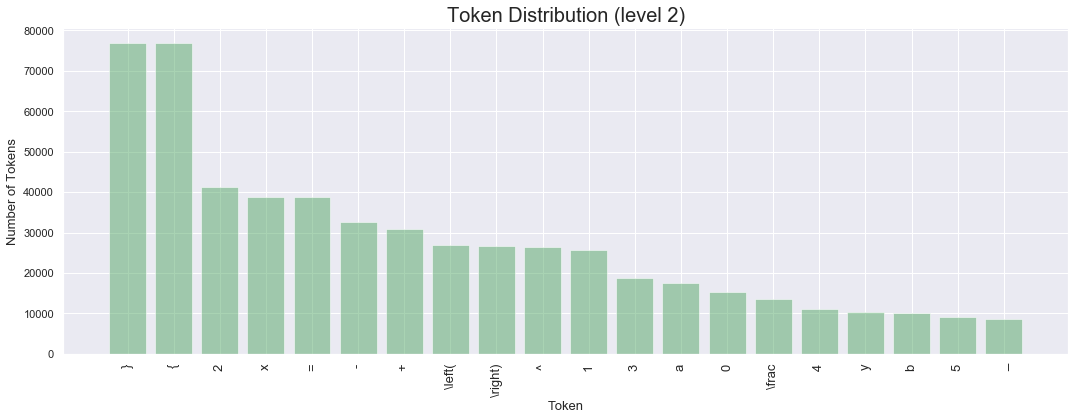

In [19]:
plot_dist(df=level_dfs[level], field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
      ylabel='Frequency', title='Sequence Length Distribution (level {})'.format(level+1))
plot_dist(df=level_dfs[level], field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
      ylabel='Frequency', title='Aspect Ratio Distribution (level {})'.format(level+1))
g = sns.jointplot("image_width", "image_height", data=level_dfs[level], kind="kde", space=0, color="r")
g.set_axis_labels("Image Width", "Image Height")
token_df = pd.DataFrame(lv_latex_list[level], columns =['token'])
token_df['index']=token_df.index
token_count_df = create_count_df(df=token_df, field='token', index='index',top_token=20)
plot_count_df(df=token_count_df, field='token', random_sample=False, color='g', rotation=90, xlabel='Token', \
          ylabel='Number of Tokens', title='Token Distribution (level {})'.format(level+1))

In [20]:
level=2
level_dfs[level].describe()

,seq_len,aspect_ratio,image_width,image_height,level
count,33784.000000,33784.000000,33784.000000,33784.000000,33784.0
mean,20.398206,4.197129,1551.830867,406.949148,3.0
std,16.958942,2.449830,1512.012749,417.808528,0.0
min,1.000000,0.100000,42.000000,24.000000,3.0
25%,8.000000,2.500000,595.000000,188.000000,3.0
50%,15.000000,3.600000,1110.000000,296.000000,3.0
75%,27.000000,5.400000,1992.000000,482.000000,3.0
max,235.000000,21.300000,11810.000000,10020.000000,3.0


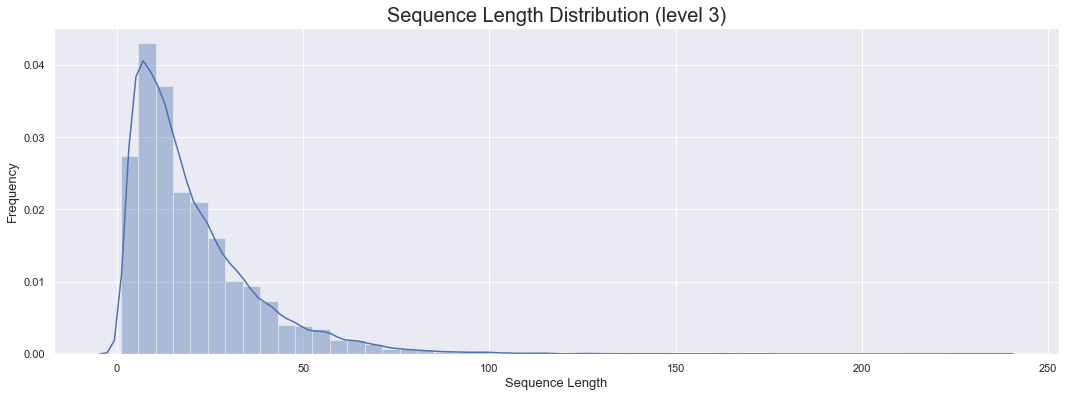

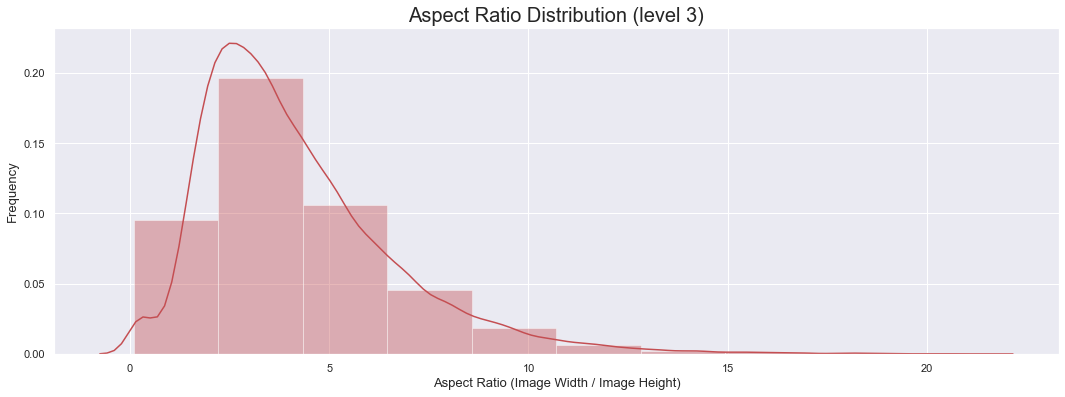

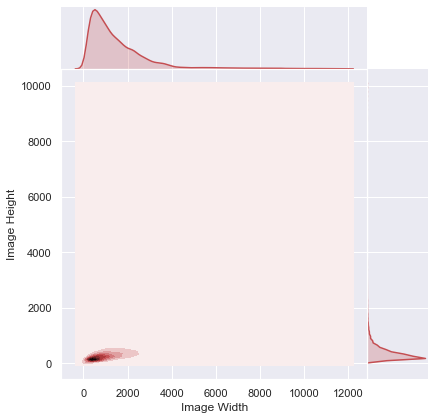

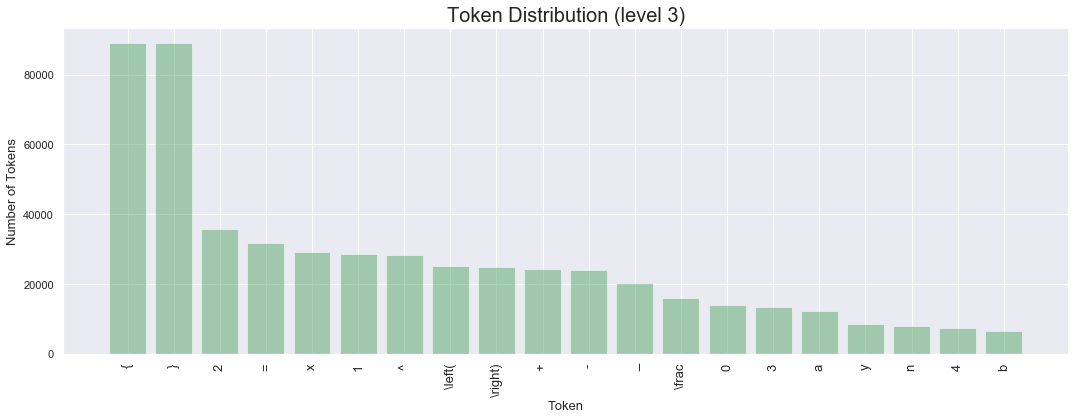

In [21]:
plot_dist(df=level_dfs[level], field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
      ylabel='Frequency', title='Sequence Length Distribution (level {})'.format(level+1))
plot_dist(df=level_dfs[level], field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
      ylabel='Frequency', title='Aspect Ratio Distribution (level {})'.format(level+1))
g = sns.jointplot("image_width", "image_height", data=level_dfs[level], kind="kde", space=0, color="r")
g.set_axis_labels("Image Width", "Image Height")
token_df = pd.DataFrame(lv_latex_list[level], columns =['token'])
token_df['index']=token_df.index
token_count_df = create_count_df(df=token_df, field='token', index='index',top_token=20)
plot_count_df(df=token_count_df, field='token', random_sample=False, color='g', rotation=90, xlabel='Token', \
          ylabel='Number of Tokens', title='Token Distribution (level {})'.format(level+1))

In [22]:
level=3
level_dfs[level].describe()

,seq_len,aspect_ratio,image_width,image_height,level
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.0
mean,20.917799,4.106339,1199.506328,380.810171,4.0
std,17.487889,2.547925,813.035907,401.219907,0.0
min,1.000000,0.100000,80.000000,34.000000,4.0
25%,9.000000,2.500000,545.000000,195.000000,4.0
50%,16.000000,3.700000,1003.000000,280.000000,4.0
75%,28.000000,5.400000,1722.000000,405.000000,4.0
max,196.000000,25.200000,4100.000000,3966.000000,4.0


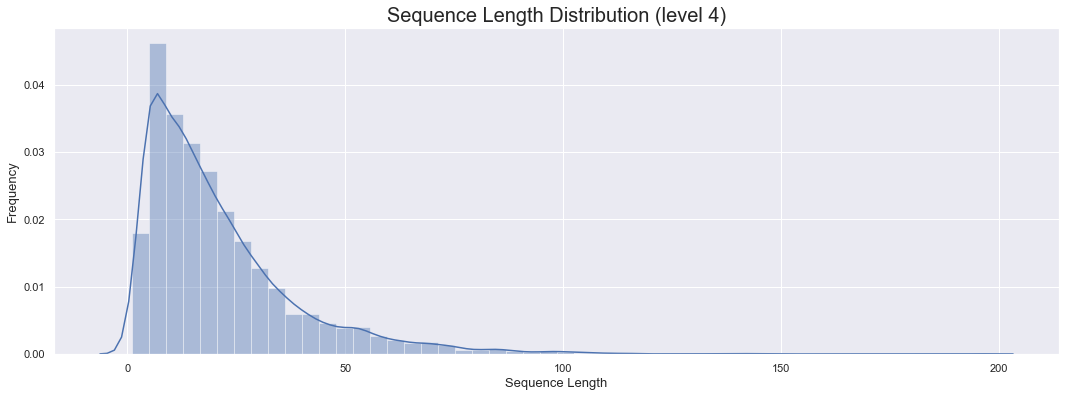

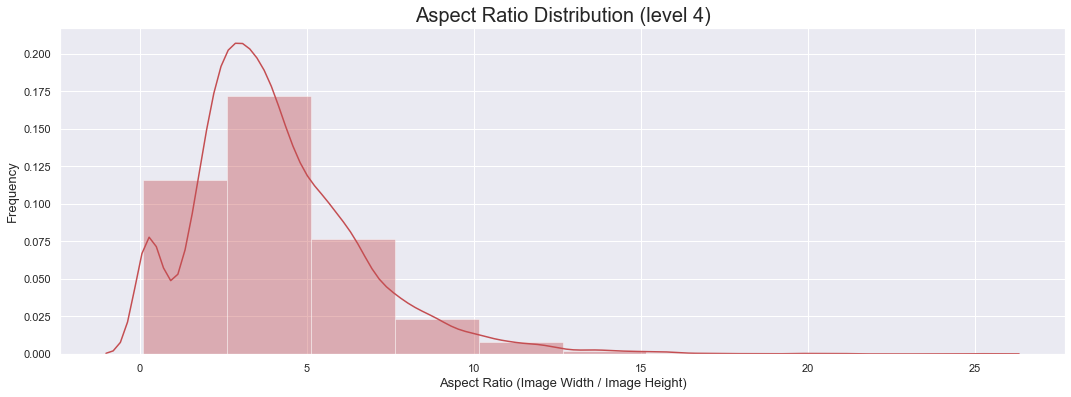

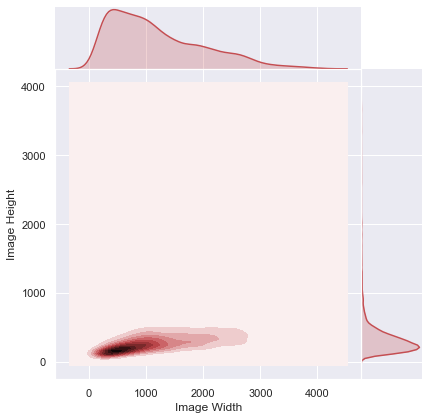

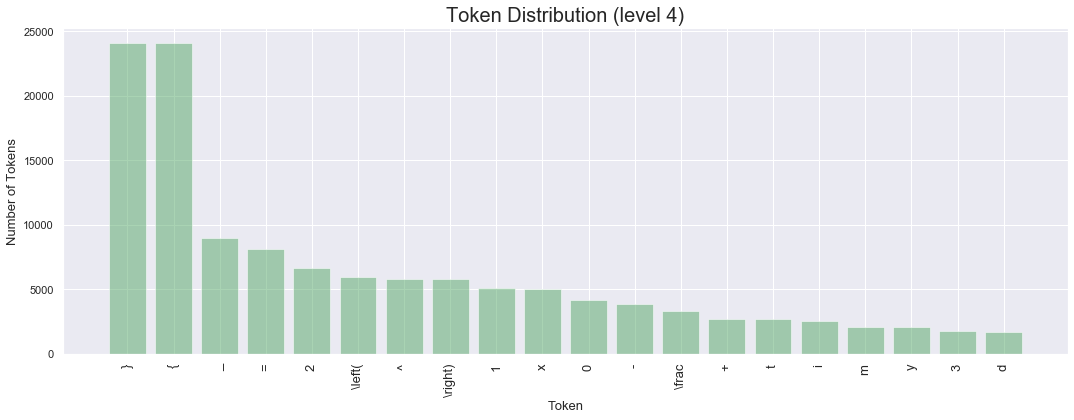

In [23]:
plot_dist(df=level_dfs[level], field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
      ylabel='Frequency', title='Sequence Length Distribution (level {})'.format(level+1))
plot_dist(df=level_dfs[level], field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
      ylabel='Frequency', title='Aspect Ratio Distribution (level {})'.format(level+1))
g = sns.jointplot("image_width", "image_height", data=level_dfs[level], kind="kde", space=0, color="r")
g.set_axis_labels("Image Width", "Image Height")
token_df = pd.DataFrame(lv_latex_list[level], columns =['token'])
token_df['index']=token_df.index
token_count_df = create_count_df(df=token_df, field='token', index='index',top_token=20)
plot_count_df(df=token_count_df, field='token', random_sample=False, color='g', rotation=90, xlabel='Token', \
          ylabel='Number of Tokens', title='Token Distribution (level {})'.format(level+1))

In [24]:
level=4
level_dfs[level].describe()

,seq_len,aspect_ratio,image_width,image_height,level
count,572.000000,572.000000,572.000000,572.000000,572.0
mean,23.517483,3.559965,826.438811,233.078671,5.0
std,22.658155,2.281400,624.750700,127.075466,0.0
min,3.000000,0.700000,74.000000,70.000000,5.0
25%,8.000000,2.000000,332.750000,143.750000,5.0
50%,16.000000,3.000000,626.500000,194.000000,5.0
75%,30.000000,4.600000,1122.000000,298.000000,5.0
max,139.000000,16.700000,2702.000000,1194.000000,5.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


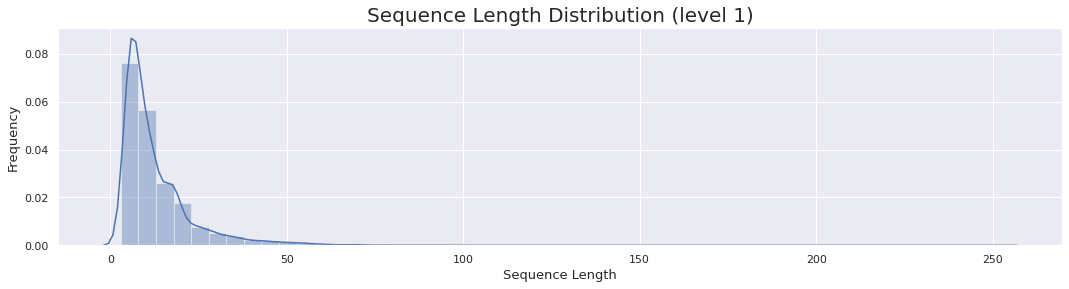

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


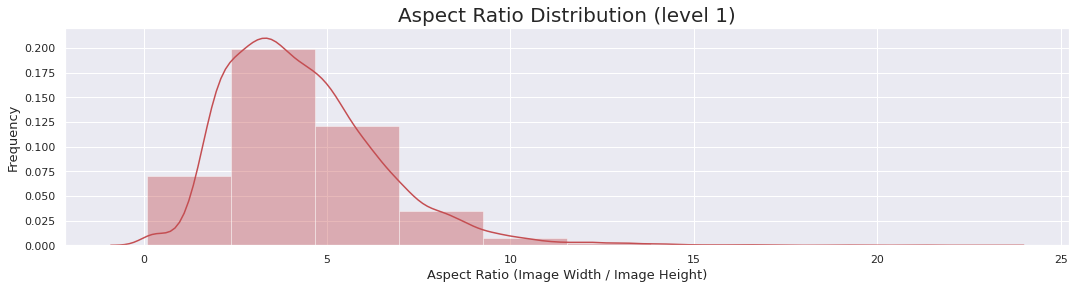

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: name 'create_count_df' is not defined

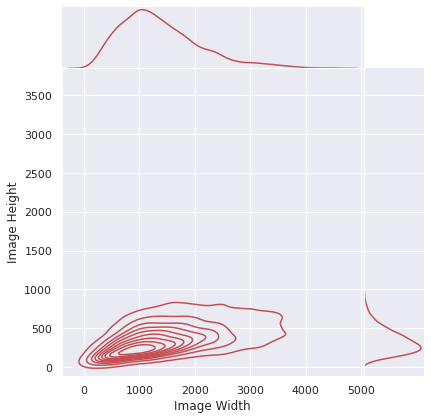

In [56]:
plot_dist(df=level_dfs[level], field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
      ylabel='Frequency', title='Sequence Length Distribution (level {})'.format(level+1))
plot_dist(df=level_dfs[level], field='seq_len', bins=50, color='b', xlabel='Sequence Length', \
      ylabel='Frequency', title='Sequence Length Distribution (level {})'.format(level+1))
plot_dist(df=level_dfs[level], field='aspect_ratio', bins=10, color='r', xlabel='Aspect Ratio (Image Width / Image Height)', \
      ylabel='Frequency', title='Aspect Ratio Distribution (level {})'.format(level+1))
g = sns.jointplot("image_width", "image_height", data=level_dfs[level], kind="kde", space=0, color="r")
g.set_axis_labels("Image Width", "Image Height")
token_df = pd.DataFrame(lv_latex_list[level], columns =['token'])
token_df['index']=token_df.index
token_count_df = create_count_df(df=token_df, field='token', index='index',top_token=20)
plot_count_df(df=token_count_df, field='token', random_sample=False, color='g', rotation=90, xlabel='Token', \
          ylabel='Number of Tokens', title='Token Distribution (level {})'.format(level+1))